In [21]:
%load_ext autoreload
%autoreload 2

# Some brief concepts on numerical python - NUMPY

Python is not designed specifically for mathematical and scientific computing.
In particular, Python lists are very flexible containers, but they are poorly suited to efficiently represent common mathematical constructs like vectors and matrices. 

Fortunately, the **numpy** package (module) exists. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. It is used in almost all numerical computation using Python.


Why not simply use Python lists for computations instead of creating a new array type?

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementating such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are statically typed and homogeneous. The type of the elements is determined when array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of numpy arrays can be implemented in a compiled language (C and Fortran is used).

## Basics of Numpy

To use **numpy** it is needed to import the module:

In [22]:
import numpy as np

## Creating numpy arrays
There are a number of ways to initialize new numpy arrays, for example from

1. A Python list or tuples
2. Using array-generating functions, such as `arange`, `linspace`, etc.
3. Reading data from files


numpy.array is a function that returns a numpy.ndarray. There is no object type numpy.array.



### 1. From a list
For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [23]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [24]:
type(v)

numpy.ndarray

In [25]:
v.dtype

dtype('int64')

In [26]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [27]:
M = np.array([[1, 2], [3, 4]], dtype=int)
M

array([[1, 2],
       [3, 4]])

Common type that can be used with dtype are: int, float, complex, bool, object, etc.

We can also explicitly define the bit size of the data types, for example: int64, int16, float128, complex128.

### 2. Using array-generating functions
For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

**Zeros and Ones**

In [28]:
np.zeros(5, dtype=float)
np.ones(5,dtype=float)

array([ 0.,  0.,  0.,  0.,  0.])

In [30]:
a = np.zeros((23,3),dtype=np.int64)  #a matrix of size 23*3
a.shape

(23, 3)

In [31]:
a.ndim     #the array's number of dimensions

2

**arange**

In [32]:
x = np.arange(0, 20, 1) # arguments: start, stop, step
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

**linspace and logspace**

In [33]:
print "A linear grid of 5 elements between 0 and 1:"
print np.linspace(0, 1,5)

A linear grid of 5 elements between 0 and 1:
[ 0.    0.25  0.5   0.75  1.  ]


**Creating random arrays**

In [34]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

array([[ 0.85405716,  0.06366232,  0.83829637,  0.87295769,  0.14766109],
       [ 0.00588122,  0.96421899,  0.33282898,  0.08547652,  0.13360255],
       [ 0.45265632,  0.82482939,  0.4974468 ,  0.74175563,  0.17434474],
       [ 0.41998901,  0.35439825,  0.50629076,  0.45068174,  0.25295016],
       [ 0.58022627,  0.4302143 ,  0.3375936 ,  0.19214868,  0.71994186]])

In [35]:
# 5 samples from a normal distribution with a mean of 10 and a variance of 3:
np.random.normal(10, 3, 5)

array([  4.72806412,  10.92484929,  15.52334768,  11.80026387,   8.74624797])

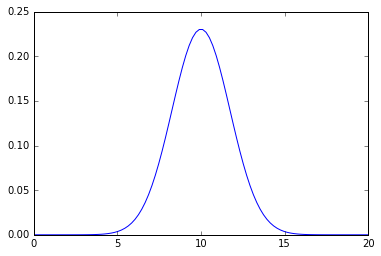

In [36]:
# Xiaoxia: plot the normal distribution with mean 10, and var 3

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 10
variance = 3
sigma = math.sqrt(variance)
x = np.linspace(-0, 20, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma))

Although out of the scope, we will need permutations at some point. Thus, here comes how to create a permutation of the elements of a given list.

In [37]:
np.random.permutation([1,2,3,4,5,6,7])

array([7, 3, 6, 2, 5, 4, 1])

Observe that each time you execute the former line, the result changes. If you want to get the same permutation everytime, we can set the seed of the Pseudo-Random Number Generator.

In [38]:
np.random.seed(1)
np.random.permutation([1,2,3,4,5,6,7])

array([7, 3, 2, 1, 5, 4, 6])

*Few remarks on NANs:*

By definition, NaN is a float point number which is not equal to any other number 

In [39]:
np.nan != np.nan

True

Thus, the equal operator can not be used for detecting NaN

Instead, isnan funtion is used:

In [40]:
a=np.array([np.nan,3,23])
print a 
np.isnan(a)

[ nan   3.  23.]


array([ True, False, False], dtype=bool)

## Manipulating arrays

In [41]:
lst = [10, 20, 30, 40] #python list
arr = np.array([10, 20, 30, 40],dtype='int64') #numpy array
M = np.array([[10, 20, 30, 40],[50, 60, 70, 80]]) #numpy matrix

** Element indexing **


In [42]:
#get the first element of list
lst[0]

10

In [43]:
#get the first element of array
arr[0]

10

If we omit an index of a multidimensional array it returns the whole row
(or, in general, a N-1 dimensional array)

In [44]:
M[1] # second row

array([50, 60, 70, 80])

In [45]:
# M is a matrix, or a 2 dimensional array, taking two indices 
print M
print M[0,0] # element from first row first column 
print M[1,1] # element from second row second column
print M[1,2] 

[[10 20 30 40]
 [50 60 70 80]]
10
60
70


The same thing can be achieved with using `:` instead of an index: 

In [46]:
M[1,:] # second row, all columns 

array([50, 60, 70, 80])

In [47]:
M[:,3] # all rows, fourth column 

array([40, 80])

We can assign new values to elements in an array using indexing:

In [48]:
M[0,0] = 1
M

array([[ 1, 20, 30, 40],
       [50, 60, 70, 80]])

In [49]:
# also works for rows and columns
M[1,:] = 0
M

array([[ 1, 20, 30, 40],
       [ 0,  0,  0,  0]])

Arrays are homogeneous; i.e. all elements of an array must be of the same type


In [50]:
#Lists are not heterogeneous
lst[1] = 'a string inside a list'
lst

[10, 'a string inside a list', 30, 40]

In [51]:
#Arrays are homogeneous
arr[1] = 'a string inside an array'
arr

ValueError: invalid literal for long() with base 10: 'a string inside an array'

Once an array has been created, its dtype is fixed and it can only store elements of the same type. For this example where the dtype is integer, if we store a floating point number it will be automatically converted into an integer:

In [52]:
arr[1] = 1.234
arr

array([10,  1, 30, 40])

In [53]:
arr = np.array(arr, dtype='float32')
arr

array([ 10.,   1.,  30.,  40.], dtype=float32)

In [54]:
""" Xiaoxia:
    the difference between list and array: 
    Arrays are homogeneous; i.e. all elements of an array must be of the same type
    And a list could have different type of elements 
""" 

lista_test = [23123,"asdasd"]
array_test = np.array([23123,"asdasd"])

print lista_test   #note the first element is a number
print array_test    #note the first element is a string


[23123, 'asdasd']
['23123' 'asdasd']


** Index slicing **

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [55]:
import numpy as np
A = np.array([1,2,3,4,5])
#slice from second to fourthelement, step is one
A[1:3:1]

array([2, 3])

In [56]:
A[1:3:1] = [-2,-3]
A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`, by default `lower` is the beginning , `upper` is the end of the array, and `step` is one

In [57]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [58]:
A[:3] # first three elements

array([ 1, -2, -3])

In [59]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array:

In [60]:
A[-1] # the last element in the array

5

In [61]:
A[-3:] # the last three elements

array([-3,  4,  5])

In [62]:
A[::-1] #Step backwards, it returns an array with elements in reverse order

array([ 5,  4, -3, -2,  1])

Index slicing works exactly the same way for multidimensional arrays, but every dimension separated by comma:

In [63]:
M

array([[ 1, 20, 30, 40],
       [ 0,  0,  0,  0]])

In [64]:
#a block from the original array
#all rows, two central columns
M[:, 1:3]


array([[20, 30],
       [ 0,  0]])

In [65]:
# all row, skiping even columns
M[:, ::2]

array([[ 1, 30],
       [ 0,  0]])

** Indexing with other arrays  (*Fancy indexing*)** 

Arrays allow for a more sophisticated kind of indexing: you can index an array with another array, and in particular with an array of boolean values.  This is particluarly useful to **filter**
information from an array that matches a certain condition.

In [66]:
arr = np.array([10,1,30,40])
print arr
mask = arr < 9 # construct a boolean array 
               #where i-th eleement is True if the i-th element of arr is less than 9
mask

[10  1 30 40]


array([False,  True, False, False], dtype=bool)

In [67]:
print 'Values below 9:', arr[mask]

Values below 9: [1]


The index mask can be converted to position index using the `where` function

In [68]:
indices = np.where(mask)
indices

(array([1]),)

In [69]:
print 'Resetting all values below 9 to 10...'
arr[arr < 9] = 10
print arr
arr < 9

Resetting all values below 9 to 10...
[10 10 30 40]


array([False, False, False, False], dtype=bool)

It is also possible to select using integer arrays that represent indexes.

In [70]:
print arr
row_indices = [1, 2 ,3]
arr[row_indices]

[10 10 30 40]


array([10, 30, 40])

In [71]:
a = np.array([2, 4, 6, 8], float) 
b = np.array([0, 0, 1, 3, 2, 1], int) 
a[b]     # the 0th, 0th, 1st, 3rd, 2nd, and 1st elements of a

array([ 2.,  2.,  4.,  8.,  6.,  4.])

For multidimensional arrays, we have to send multiple one-dimensional integer arrays to the 
selection bracket, one for each axis.

In [72]:
a = np.array([[1, 4], [9, 16]], float) 
print a
b = np.array([0, 0, 1, 1, 1], int) 
c = np.array([0, 1, 1, 1, 0], int) 
a[b,c] 

print "a[b,c] =", a[b,c]

[[  1.   4.]
 [  9.  16.]]
a[b,c] = [  1.   4.  16.  16.   9.]


`np.where` can also be used as a conditional statement.

In [73]:
print a
print np.where(a==9,1,0)


[[  1.   4.]
 [  9.  16.]]
[[0 0]
 [1 0]]


In [74]:
# added by myself, just to learn some basic function

import numpy as np
print np.random.randint(0,100,10)
print isinstance(3,int)
print isinstance(3,str)

[ 5 79 64 16  1 76 71  6 25 50]
True
False


# The machine learning pipeline

Modeling churn means to understand what keeps the customer engaged to our product. Its analysis goal is to predict or describe the **churn rate** i.e. the rate at which customer leave or cease the subscription to a service. Its value lies in the fact that engaging new customers is often more costly than retaining existing ones. For that reason subscription business-based companies usually have proactive policies towards customer retention.

In this case study, we aim at building a machine learning based model for customer churn prediction on data from a Telecom company. Each row on the dataset represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

This case is partially inspired in Eric Chiang's analysis of churn rate. Data is available from the University of California Irvine machine learning repositories data set.

## Goal
 + Implement a full machine learning pipeline.
 + Understand the concepts of training, validation, and test.

In [1]:
%reset -f
import datalist
import inspect

print 'Source file: ',inspect.getsourcefile(datalist)

dl = datalist.DataList()
dl.read_csv('./files/churn_curated_numerical.csv')

Source file:  datalist.py


In [2]:
# Xiaoxia: we can also use the Pandas library to read csv.

import pandas as pd
dl = pd.read_csv('./files/churn_curated_numerical.csv')

In [3]:
data = dl.get_values()

In [4]:
data

array([[ 107.  ,  415.  ,    0.  , ...,    3.7 ,    1.  ,    0.  ],
       [ 137.  ,  415.  ,    0.  , ...,    3.29,    0.  ,    0.  ],
       [  84.  ,  408.  ,    1.  , ...,    1.78,    2.  ,    0.  ],
       ..., 
       [  28.  ,  510.  ,    0.  , ...,    3.81,    2.  ,    0.  ],
       [ 184.  ,  510.  ,    1.  , ...,    1.35,    2.  ,    0.  ],
       [  74.  ,  415.  ,    0.  , ...,    3.7 ,    0.  ,    0.  ]])

In [5]:
X = data[:,:-1]     #all except the last column
y = data[:,-1]       # all the rows of the last column

In [6]:
X

array([[ 107.  ,  415.  ,    0.  , ...,    3.  ,    3.7 ,    1.  ],
       [ 137.  ,  415.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       [  84.  ,  408.  ,    1.  , ...,    7.  ,    1.78,    2.  ],
       ..., 
       [  28.  ,  510.  ,    0.  , ...,    6.  ,    3.81,    2.  ],
       [ 184.  ,  510.  ,    1.  , ...,   10.  ,    1.35,    2.  ],
       [  74.  ,  415.  ,    0.  , ...,    4.  ,    3.7 ,    0.  ]])

In [10]:
y

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [11]:
%matplotlib inline   
# Xiaoxia: magic functions, Line magics are prefixed with the %, Cell magics are prefixed with a double %%

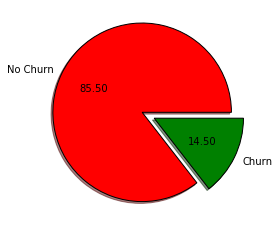

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],
        explode=(0.15, 0),  # explode 1st slice
        labels=['No Churn','Churn'],
        colors=['r','g'],
        shadow=True,
        autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(4,4)

## Data

Observe data

In [13]:
X.shape

(3332, 18)

In [14]:
np.mean(X,axis=0).shape

(18,)

In [15]:
np.mean(X,axis=1).shape

(3332,)

In [16]:
import numpy as np

np.mean(X,axis=0)


array([  1.01056723e+02,   4.37189076e+02,   9.69387755e-02,
         2.76410564e-01,   8.09393758e+00,   1.79749490e+02,
         1.00432773e+02,   3.05579532e+01,   2.00981423e+02,
         1.00114646e+02,   1.70836315e+01,   2.00858884e+02,
         1.00110444e+02,   9.03873349e+00,   1.02373649e+01,
         4.47989196e+00,   2.76460084e+00,   1.56302521e+00])

In [17]:
np.var(X,axis=0)

array([  1.58558232e+03,   1.79517854e+03,   8.75416493e-02,
         2.00007764e-01,   1.87285593e+02,   2.96451086e+03,
         4.02740679e+02,   8.56739421e+01,   2.57189017e+03,
         3.96910626e+02,   1.85818279e+01,   2.55713733e+03,
         3.82905569e+02,   5.17843129e+00,   7.79435116e+00,
         6.05691860e+00,   5.68171899e-01,   1.73042158e+00])

Create and fit a decision tree (you can find it in the module sklearn.tree and the name is DecisionTreeClassifier)

In [18]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Predict the data you used for training/fiting the classifer

In [19]:
help(clf.predict)

Help on method predict in module sklearn.tree.tree:

predict(self, X, check_input=True) method of sklearn.tree.tree.DecisionTreeClassifier instance
    Predict class or regression value for X.
    
    For a classification model, the predicted class for each sample in X is
    returned. For a regression model, the predicted value based on X is
    returned.
    
    Parameters
    ----------
    X : array-like or sparse matrix of shape = [n_samples, n_features]
        The input samples. Internally, it will be converted to
        ``dtype=np.float32`` and if a sparse matrix is provided
        to a sparse ``csr_matrix``.
    
    check_input : boolean, (default=True)
        Allow to bypass several input checking.
        Don't use this parameter unless you know what you do.
    
    Returns
    -------
    y : array of shape = [n_samples] or [n_samples, n_outputs]
        The predicted classes, or the predict values.



In [20]:
yhat = clf.predict(X)

In [21]:
yhat[0:20]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [22]:
y[0:20]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.])

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> We need a measure of how well the classifier is performing. Create a measure  the accuracy. </div>

In [23]:
#Your code here

def accuracy(y,yhat):
    return np.mean(y==yhat)

accuracy(y,yhat)

1.0


Error rate: 

One sensible way of measuring the goodness of a classifier is measuring the error rate, i.e. the number of times the classifier fails divided by the total number of elements.

$$err = \frac{1}{N}\sum \mathbb{1}_{\tilde{y}!=y}$$

where $\mathbb{1}_{\text{cond}}$ is the indicator function given a condition, $\text{cond}$, defined as 

$$\mathbb{1}_{\text{cond}}=\left \{\begin{align} 1 & \quad\text{if cond = True}\\ 0 & \quad\text{otherwise} \end{align}\right.$$
Alternatively, we can report the accuracy, defined as the rate of success

$$acc = \frac{1}{N}\sum \mathbb{1}_{\tilde{y}==y}.$$

Observe that $acc = 1-err$.

`sklearn` reports this result using the method from module `metrics`, `.accuracy_score`.

In [24]:
from sklearn import metrics

metrics.accuracy_score(y,yhat)

1.0

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this a good result?</div>

In real applications we will train a classifier on a given data set but then apply the classifier to unseen data. Let us simulate this process by spliting the data set in two sets. We will call data we use for fiting the classifier training and data used for assessing the performance, test data.

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> Split the data set 70% for training purposes and the rest for test purposes. You should end up with four variables `X_train`, `y_train`, `X_test`, `y_test`. <p>
<b>OTHER REQUIREMENTS:</b> Reshuffle data using a permutation of the indexes and set the seed of the random number generator using `np.random.seed(42)`
</div>

Split data in training and set, use the module cross_validation, train_test_split , use random_state=42 as an argument for reproductibility.

In [25]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, train_size=0.7, random_state=42)

#random_state es para que siempre hagamos la misma particion

Let us try a new algorithm, nearest neighbor, with parameter n_neighbors = 1

In [26]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
yhat = clf.predict(X_train)
from sklearn import metrics

metrics.accuracy_score(y_train,yhat)


1.0

In [27]:
yhat = clf.predict(X_test)
from sklearn import metrics

metrics.accuracy_score(y_test,yhat)

0.81200000000000006

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this a good result?</div>

In [28]:
# it's a really bad result,because we would get better score if we just say that everybody churn.
# each column has very different scale. We need to standarize. 

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_scaled,y_train)
yhat = clf.predict(X_train_scaled)

from sklearn import metrics

metrics.accuracy_score(y_train,yhat)


1.0

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X_test_scaled = scaler.transform(X_test)
yhat = clf.predict(X_test_scaled)
metrics.accuracy_score(y_test,yhat)     

0.84499999999999997

This result is ok, but how consistent is it? Maybe we have been lucky with the train-test partion. We can repeat this process for different values of the random_state (or just use random permutations) and report the average result.

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> We want a vector of accuracies, `acc`, of shape (10,1) with the values of testing a 1-NN classifier on a `train_size=0.7` for the different random_states stored in the array `r_state`. Use `sklearn.cross_validation.train_test_split` function.
</div>

In [31]:
r_state = [0,1,2,3,4,5,42,43,44,45]

#Your code here
from sklearn import metrics
from sklearn import cross_validation
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
import pandas as pd

dl = pd.read_csv('./files/churn_curated_numerical.csv')
data = dl.get_values()
X=data[:,:-1]
y=data[:,-1]

accuracies = []
for state in r_state:
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, train_size=0.7, random_state=state)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=1)  
    clf.fit(X_train_scaled,y_train)
    yhat_train = clf.predict(X_train_scaled)
    yhat_test = clf.predict(X_test_scaled)

    acc = metrics.accuracy_score(y_test,yhat_test)    
    accuracies.append(acc)

accuracies    


[0.86799999999999999,
 0.86699999999999999,
 0.86799999999999999,
 0.878,
 0.85399999999999998,
 0.86799999999999999,
 0.84499999999999997,
 0.85899999999999999,
 0.86199999999999999,
 0.85599999999999998]

In [32]:
import numpy as np

print accuracies
value = np.sum(accuracies)/len(accuracies)
print "average accuracy: ", value

[0.86799999999999999, 0.86699999999999999, 0.86799999999999999, 0.878, 0.85399999999999998, 0.86799999999999999, 0.84499999999999997, 0.85899999999999999, 0.86199999999999999, 0.85599999999999998]
average accuracy:  0.8625


In [33]:
accuracies = np.array(accuracies).reshape([10,1])
print accuracies.shape

(10, 1)


Check your code with the following visualization code:

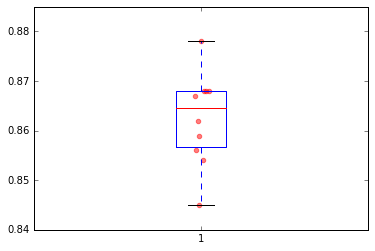

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()
plt.boxplot(accuracies)
fig.hold('on')   #plot one figure over the other

plt.scatter(np.ones(accuracies.shape)+0.01*np.random.normal(size=(10,1)),accuracies,alpha = 0.5,color='r')

<div class = "alert alert-danger" style = "border-radius:10px"> <b>QUIZ:</b> Report the average accuracy.</div>

In [35]:
#Your code
#compute the average accuracy

import numpy as np

print accuracies
value = np.sum(accuracies)/len(accuracies)
print value

[[ 0.868]
 [ 0.867]
 [ 0.868]
 [ 0.878]
 [ 0.854]
 [ 0.868]
 [ 0.845]
 [ 0.859]
 [ 0.862]
 [ 0.856]]
0.8625


In [36]:
assert np.abs(value-0.8625)<0.0001, 'NOT CORRECT'

Extra material: Simple demo of a scatter plot


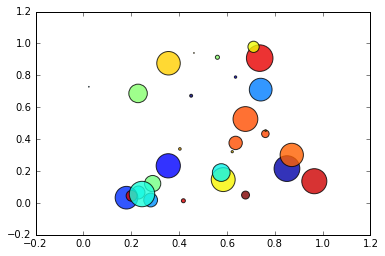

In [37]:
# Xiaoxia: nice example of scatter plot
"""
Simple demo of a scatter plot.
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


N = 30
xx = np.random.rand(N)
yy = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2          # 0 to 15 point radiuses

#print xx
#print yy
plt.scatter(xx, yy, s=area, c=colors, alpha=0.8)    #Xiaoxia: alpha es la transparencia
plt.show()

# Model selection (I)

We have tried a 1-Nearest Neighbors classifiers but we could try also different values for the Nearest Neighbors. The selection of a model between different alternatives is called model selection. We can use the same strategy as before and report accuracies for the three models. Let us do it comparintg 1-NN, 3-NN and a DecisionTree.

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> We want a matrix of accuracies, `acc`, of shape (10,3) with the values of testing a decision tree, a 1-NN, and a 3-NN classifier on a `train_size=0.7` for the different random_states stored in the array `r_state`. 
</div>

In [39]:
#My code

from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),3))

for i in xrange(len(r_state)):
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, train_size=0.7, random_state=r_state[i])
    
    #Your code here

    clf_tr = tree.DecisionTreeClassifier() 
    clf_tr.fit(X_train,y_train)
    yhat_tr = clf_tr.predict(X_test)
    
    clf_nn1 = neighbors.KNeighborsClassifier(n_neighbors=1)      
    clf_nn1.fit(X_train,y_train)
    yhat_nn1 = clf_nn1.predict(X_test)
    
    clf_nn3 = neighbors.KNeighborsClassifier(n_neighbors=3)      
    clf_nn3.fit(X_train,y_train)
    yhat_nn3 = clf_nn3.predict(X_test)
    
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_tr)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_nn1)
    acc[i,2] = metrics.accuracy_score(y_test,yhat_nn3)

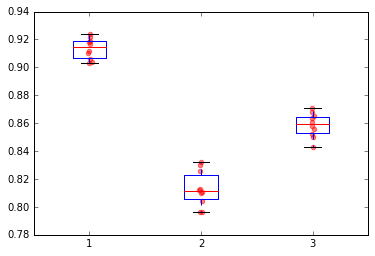

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.boxplot(acc)
fig.hold('on')
plt.scatter(np.tile(np.array([1,2,3]),(10,1))+0.01*np.random.normal(size=(10,3)),acc,alpha = 0.5,color='r')

<div class = "alert alert-danger" style = "border-radius:10px" ><b>QUIZ:</b > What is the best of the three methods?</div>

the first method, decision tree


<div class = "alert alert-danger" style = "border-radius:10px"><b>QUIZ:</b> What is the expected accuracy of the selected method in exploitation over unseen data? </div>

In [41]:
# we would need to separate the data in three parts.   k-fold